<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week3/d8/sol/student_analisis_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Analsis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

## Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [401]:
import pandas as pd
import numpy as np

In [402]:
df = pd.read_csv("xAPI-Edu-Data.csv")

In [262]:
df["Class"]

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [ ]:
##ls data

ls: cannot access 'data': No such file or directory


In [368]:
df.dtypes#show columns and dtypes

gender                      int64
NationalITy                 int64
PlaceofBirth                int64
StageID                     int64
GradeID                     int64
SectionID                   int64
Topic                       int64
Semester                    int64
Relation                    int64
raisedhands                 int64
VisITedResources            int64
AnnouncementsView           int64
Discussion                  int64
ParentAnsweringSurvey       int64
ParentschoolSatisfaction    int64
StudentAbsenceDays          int64
Class                       int64
dtype: object

In [369]:
#check out the types with object bcz it becomes confusing later
df.describe()
#type(df["gender"][0])

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.635417,4.345833,4.397917,1.345833,2.906250,0.472917,5.256250,0.489583,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,1.143750
std,0.481815,2.469265,2.628334,0.603732,2.464267,0.612411,3.388388,0.500413,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,0.846312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,4.000000,1.000000,4.000000,0.000000,5.000000,0.000000,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,4.000000,2.000000,5.000000,1.000000,7.000000,1.000000,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,13.000000,13.000000,2.000000,9.000000,2.000000,11.000000,1.000000,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,2.000000


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    480 non-null    int64
 1   NationalITy               480 non-null    int64
 2   PlaceofBirth              480 non-null    int64
 3   StageID                   480 non-null    int64
 4   GradeID                   480 non-null    int64
 5   SectionID                 480 non-null    int64
 6   Topic                     480 non-null    int64
 7   Semester                  480 non-null    int64
 8   Relation                  480 non-null    int64
 9   raisedhands               480 non-null    int64
 10  VisITedResources          480 non-null    int64
 11  AnnouncementsView         480 non-null    int64
 12  Discussion                480 non-null    int64
 13  ParentAnsweringSurvey     480 non-null    int64
 14  ParentschoolSatisfaction  480 non-null    

## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [407]:
# check for null values
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [ ]:
#another way to make it label encoder with multiple columns is df_col=list(df.columns)

#for i in range(len(df_col)):
#df[df_col[i] inclue == object] = LabelEncoder().fit_transform(df[df_col[i]])

## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [420]:
from sklearn import preprocessing
# Encode labels of multiple columns at once
cols = ['gender',"NationalITy" ,'PlaceofBirth', 'StageID', 'GradeID',"SectionID","Topic","Semester","Relation","ParentAnsweringSurvey","ParentschoolSatisfaction","StudentAbsenceDays","Class"]
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [387]:
# Check every column EXCEPT the one for the class and find out which one has the highest variability
df.var(axis=0).max()

1094.2868432498262

In [386]:
df.iloc[:,:-1].var(axis=0)

gender                         0.232146
NationalITy                    6.097269
PlaceofBirth                   6.908138
StageID                        0.364492
GradeID                        6.072612
SectionID                      0.375048
Topic                         11.481172
Semester                       0.250413
Relation                       0.242480
raisedhands                  947.360543
VisITedResources            1094.286843
AnnouncementsView            708.158312
Discussion                   763.844398
ParentAnsweringSurvey          0.246608
ParentschoolSatisfaction       0.238761
StudentAbsenceDays             0.240079
dtype: float64

54.797916666666666

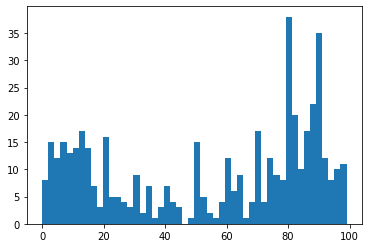

In [416]:
from statistics import *
plt.hist(df["VisITedResources"],bins = 50)
df["VisITedResources"].mean()

In [ ]:
''''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X[:10]''''

## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


In [268]:
df.skew().sort_values(ascending= False)

PlaceofBirth                1.720447
NationalITy                 1.715484
SectionID                   0.925118
AnnouncementsView           0.399243
Relation                    0.365370
Discussion                  0.362594
GradeID                     0.263863
Semester                    0.041806
raisedhands                 0.026962
Topic                      -0.004031
ParentAnsweringSurvey      -0.252767
Class                      -0.277991
StageID                    -0.333366
VisITedResources           -0.342441
StudentAbsenceDays         -0.418428
ParentschoolSatisfaction   -0.445270
gender                     -0.564462
dtype: float64

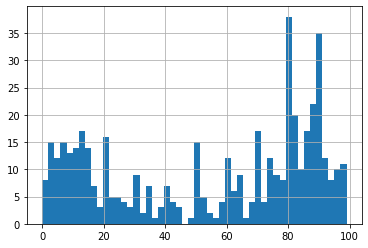

In [218]:
import seaborn as sns
df.VisITedResources.hist(bins=50)

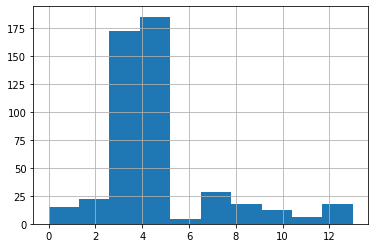

In [388]:
df.NationalITy.hist()

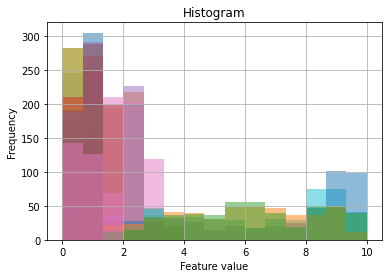

In [394]:
# Select 5 columns and find out their bias 
df_pow = df.apply(np.sqrt)
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

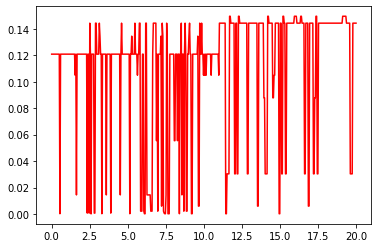

In [398]:
import scipy.stats as stats 
param = stats.norm.fit(df_pow)
x = np.linspace(0, 20, 480)      # Linear spacing of 100 elements between 0 and 20.
pdf_fitted = stats.norm.pdf(df.NationalITy, *param)
plt.plot(x, pdf_fitted, color='r')

## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

In [399]:
import matplotlib.pyplot as plt

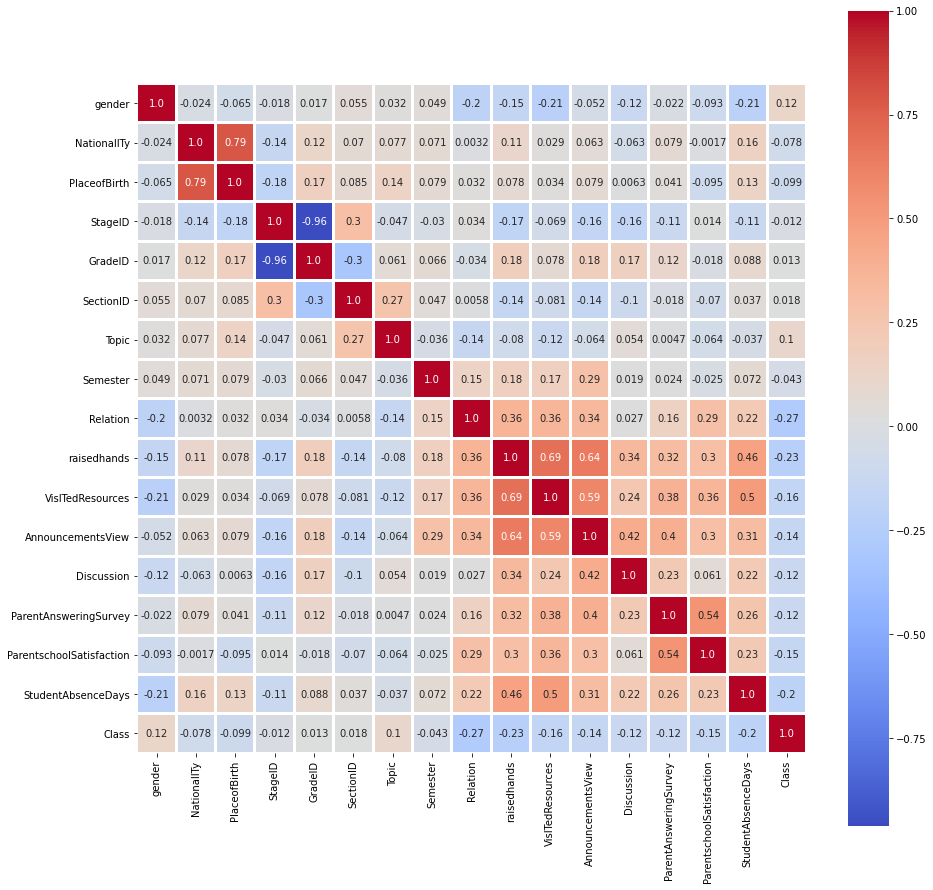

In [421]:
corr = df.corr().sort_values(ascending = False, by = "Class")
plt.figure(figsize=(15, 15))
matrix = np.triu(df.corr())
sns.heatmap(corr,annot=True,fmt=".2",cmap= 'coolwarm',linewidths=2,square = True)

In [423]:
# Select the top 4 most correlated and put them in a different dataset

df2 = df.filter(["Relation","raisedhands","gender", "Topic"], axis=1)#take two most positive corr and most negative corr with class 
# Select the top 4 least correlated and create a new dataset without them
df3 = df.drop(["SectionID","StageID","GradeID","Semester"],axis =1) #drop 4 neasres value closest t osero
df2

,Relation,raisedhands,gender,Topic
0,0,15,1,7
1,0,20,1,7
2,0,10,1,7
3,0,30,1,7
4,0,40,1,7
...,...,...,...,...
475,0,5,0,2
476,0,50,0,5
477,0,55,0,5
478,0,30,0,6


## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


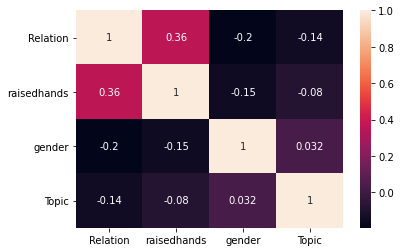

In [254]:
# Plot the correlation among themself for the previous 4 variables.
sns.heatmap(df2.corr(),annot= True)

## Step 7:
### For the previoys 4 variables plot them AGAINST the class


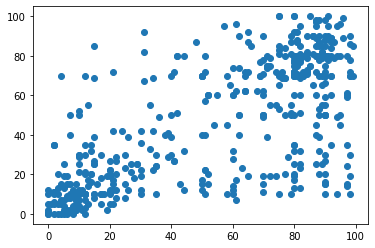

In [428]:
# make 4 plot where you plot each of the variables with the class
#plt.scatter(df["Class"],df2["raisedhands"])
plt.scatter(df["VisITedResources"],df["raisedhands"])

In [335]:
k  = df.loc[df["StudentAbsenceDays"] == 1 ]
k.loc[k["Class"] == 1].size

187

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

In [341]:
import collections
hey = np.logical_and((df["StudentAbsenceDays"] == 1).values , (df["Class"] == 1).values)
collections.Counter(hey)

Counter({False: 469, True: 11})

In [429]:
#df.loc[df["StudentAbsenceDays"] == 1 & df["Class"] == 1] ??????
#probablity of absent less than 7 is  u7 days = 1 a7days = 0 class h = 0 m = 2 l = 1
df["StudentAbsenceDays"].value_counts()

1    289
0    191
Name: StudentAbsenceDays, dtype: int64

In [319]:
df["Class"].value_counts()#127/480

2    211
0    142
1    127
Name: Class, dtype: int64

In [343]:
u7l = (127/480)*(289/480)
u7l

0.15930121527777777

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

In [432]:
# Looking at step seven extrapolate from it the probability of a student being classified as M or H
u7mh = 1-u7l
u7mh


0.8406987847222223

## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [367]:
df.loc[df["Class"]== 0].count()

gender                      142
NationalITy                 142
PlaceofBirth                142
StageID                     142
GradeID                     142
SectionID                   142
Topic                       142
Semester                    142
Relation                    142
raisedhands                 142
VisITedResources            142
AnnouncementsView           142
Discussion                  142
ParentAnsweringSurvey       142
ParentschoolSatisfaction    142
StudentAbsenceDays          142
Class                       142
dtype: int64

In [434]:
# number of H 142

heyy = np.logical_and((df["raisedhands"] > 10).values , (df["Class"] == 0).values)
collections.Counter(heyy)
141/480

0.29375

## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.